In [10]:
from nltk.classify import NaiveBayesClassifier
from nltk.corpus import movie_reviews
import pickle
import nltk.classify.util
import sys
%matplotlib notebook
import matplotlib.pyplot as plt
import numpy as np


def clean(words):
    return dict([(word, True) for word in words])


negative_ids = movie_reviews.fileids('neg')
positive_ids = movie_reviews.fileids('pos')


negative_features = [(clean(movie_reviews.words(fileids=[f])), 'negative') for f in negative_ids]
positive_features = [(clean(movie_reviews.words(fileids=[f])), 'positive') for f in positive_ids]


negative_cutoff = int(len(negative_features) * 95/100)
positive_cutoff = int(len(positive_features) * 90/100)

train_features = negative_features[:negative_cutoff] + positive_features[:positive_cutoff]
test_features = negative_features[negative_cutoff:] + positive_features[positive_cutoff:]

print('Training on %d data, testing on %d data' % (len(train_features), len(test_features)))
classifier = NaiveBayesClassifier.train(train_features)
print('Training complete')
print('accuracy:', nltk.classify.util.accuracy(classifier, test_features)*100,'%')
classifier.show_most_informative_features()


f = open('model', 'wb')
pickle.dump(classifier, f)
f.close()

Training on 1850 data, testing on 150 data
Training complete
accuracy: 81.33333333333333 %
Most Informative Features
             outstanding = True           positi : negati =     16.4 : 1.0
               ludicrous = True           negati : positi =     13.5 : 1.0
              astounding = True           positi : negati =     13.0 : 1.0
                  avoids = True           positi : negati =     13.0 : 1.0
                 idiotic = True           negati : positi =     12.3 : 1.0
             fascination = True           positi : negati =     11.6 : 1.0
               atrocious = True           negati : positi =     11.1 : 1.0
                  symbol = True           positi : negati =     10.9 : 1.0
                  annual = True           positi : negati =     10.2 : 1.0
                  hudson = True           negati : positi =      9.8 : 1.0


In [11]:
f = open('model', 'rb')
classifier = pickle.load(f)
f.close()



sentence="i don't love you "
features = clean(sentence)
print(classifier.classify(features))

sentence="i love you sweetheart "
features = clean(sentence)
print(classifier.classify(features))


sentence="i am not saying that i don't love you"
features = clean(sentence)
print(classifier.classify(features))

sentence="This size of laptop is very bad"
features = clean(sentence)
print(classifier.classify(features))



negative
positive
positive
negative


In [12]:
opinion={}
f=open('WhatsApp_Chat_with_Anikesh.txt','r')
#f=open('export_chat.txt','r')
pos,neg=0,0
for line in f:
    try:
        chat=line.split('-')[1].split(':')[1]
        name=line.split('-')[1].split(':')[0]
        if opinion.get(name,None) is None:
            opinion[name]=[0,0]
        res=classifier.classify(clean(chat))
        print(name,res,chat)
        if res=='positive':
            pos+=1
            opinion[name][0]+=1
        else:
            neg+=1
            opinion[name][1]+=1
    except:
        pass
print("positive: {} \nNegative: {}".format(pos,neg))

 Souvik Basak negative  Namaste

 Anikesh positive  Radhe Radhe

 Anikesh negative  <Media omitted>

 Souvik Basak positive  Side me e kaun hai??

 Souvik Basak negative  BTW... Namaste beta namaste

 Anikesh positive  Gourav hai

 Anikesh positive  Radhe Radhe

 Souvik Basak positive  Oh

 Anikesh negative  Bhai lekin Jo bol

 Anikesh positive  Std 8 ka pic hai

 Souvik Basak negative  Turbo my hai

 Anikesh negative  but tab bhi hum tre se to kam hi chutiye thhe

 Souvik Basak negative  Bahut lamba hai

 Anikesh positive  but thhe

 Anikesh positive  kaun

 Anikesh negative  wo.aur hum abhi same ht.  Ke hai

 Souvik Basak negative  Mera.. ðŸ˜‚ðŸ˜‚

 Souvik Basak positive  Haiin

 Souvik Basak positive  Present photo bhej USkA there saath

 Anikesh positive  Wo to nhi hai

 Anikesh negative  bahut din se Miley nhi

 Souvik Basak negative  Nikal

 Anikesh positive  Normal photo hoga

 Anikesh negative  uska ht. Nhi bada

 Anikesh negative  mera dawdi nahi bada

 Souvik Basak negative  

UnicodeDecodeError: 'charmap' codec can't decode byte 0x8f in position 7695: character maps to <undefined>

<IPython.core.display.Javascript object>


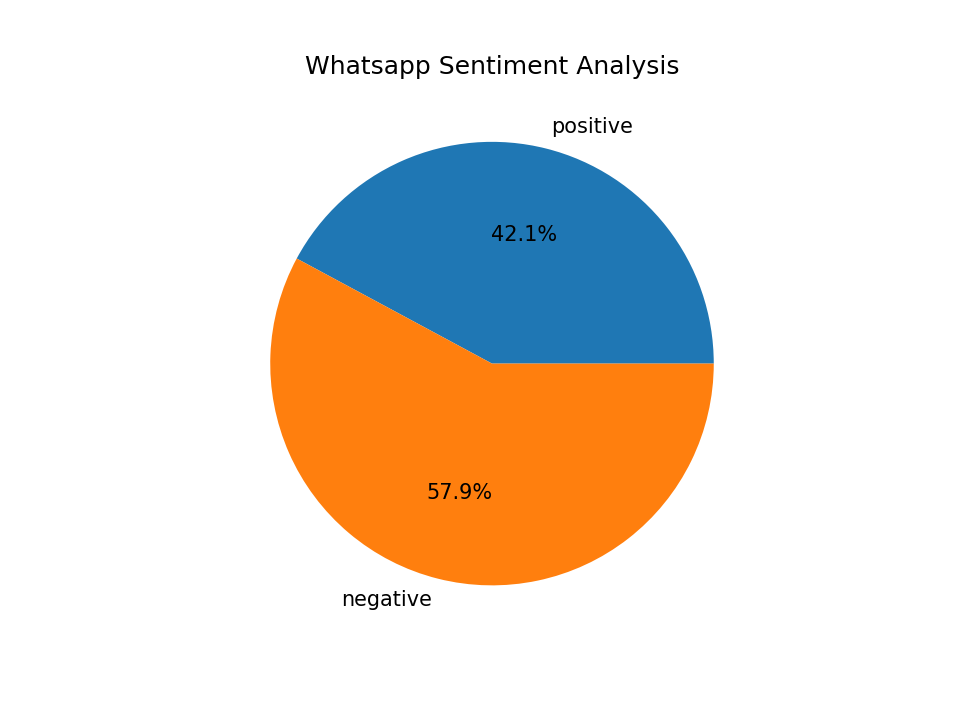

In [13]:
neg=abs(neg)
labels = ['positive','negative']
sizes = [pos,neg]
fig1, ax1 = plt.subplots()
ax1.pie(sizes ,labels=labels, autopct='%1.1f%%')
plt.title('Whatsapp Sentiment Analysis')
plt.show()
